In [10]:
import os

import pandas as pd
from aeon.visualisation.results._critical_difference import plot_critical_difference
from aeon.visualisation.results._mcm import create_multi_comparison_matrix

from tsml_eval.publications.clustering.kasba._utils import (
    load_results_from_csv,
    results_to_matrix,
)

RESULT_PATH = f"{os.getcwd()}/results"
METRICS_TO_EVALUATE = ["ami", "ari", "clacc", "nmi"]

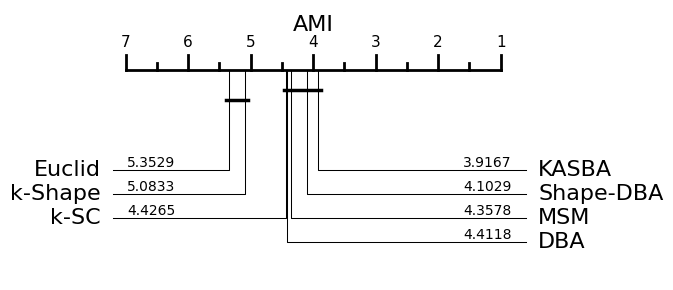

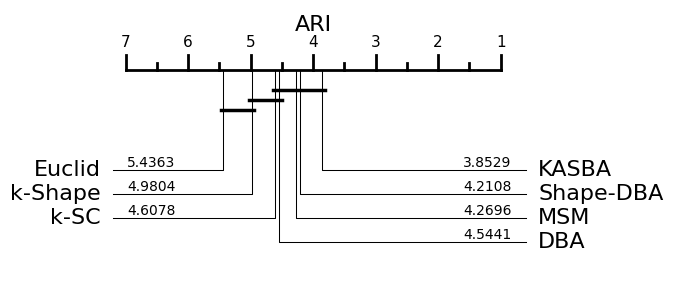

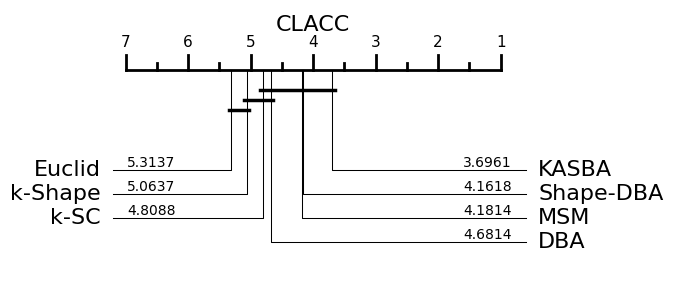

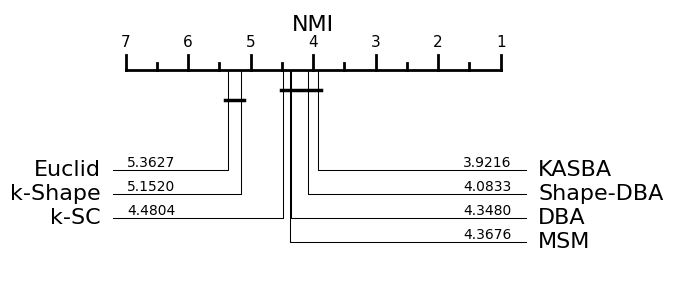

In [9]:
# CDs plot for test-train experiment
TRAIN_TEST_RESULT_PATH = f"{RESULT_PATH}/train-test/section-5.1"
METHODS = ["DBA", "Euclid", "KASBA", "MSM", "Shape-DBA", "k-SC", "k-Shape"]

for metric in METRICS_TO_EVALUATE:
    metric_res_path = f"{TRAIN_TEST_RESULT_PATH}/{metric}_mean.csv"
    mat, datasets, estimators = results_to_matrix(
        load_results_from_csv(metric_res_path)
    )
    fig, ax, *_ = plot_critical_difference(mat, METHODS, alpha=0.05)
    fig.suptitle(f"{metric.upper()}", fontsize=16)
    fig.subplots_adjust(top=0.88)

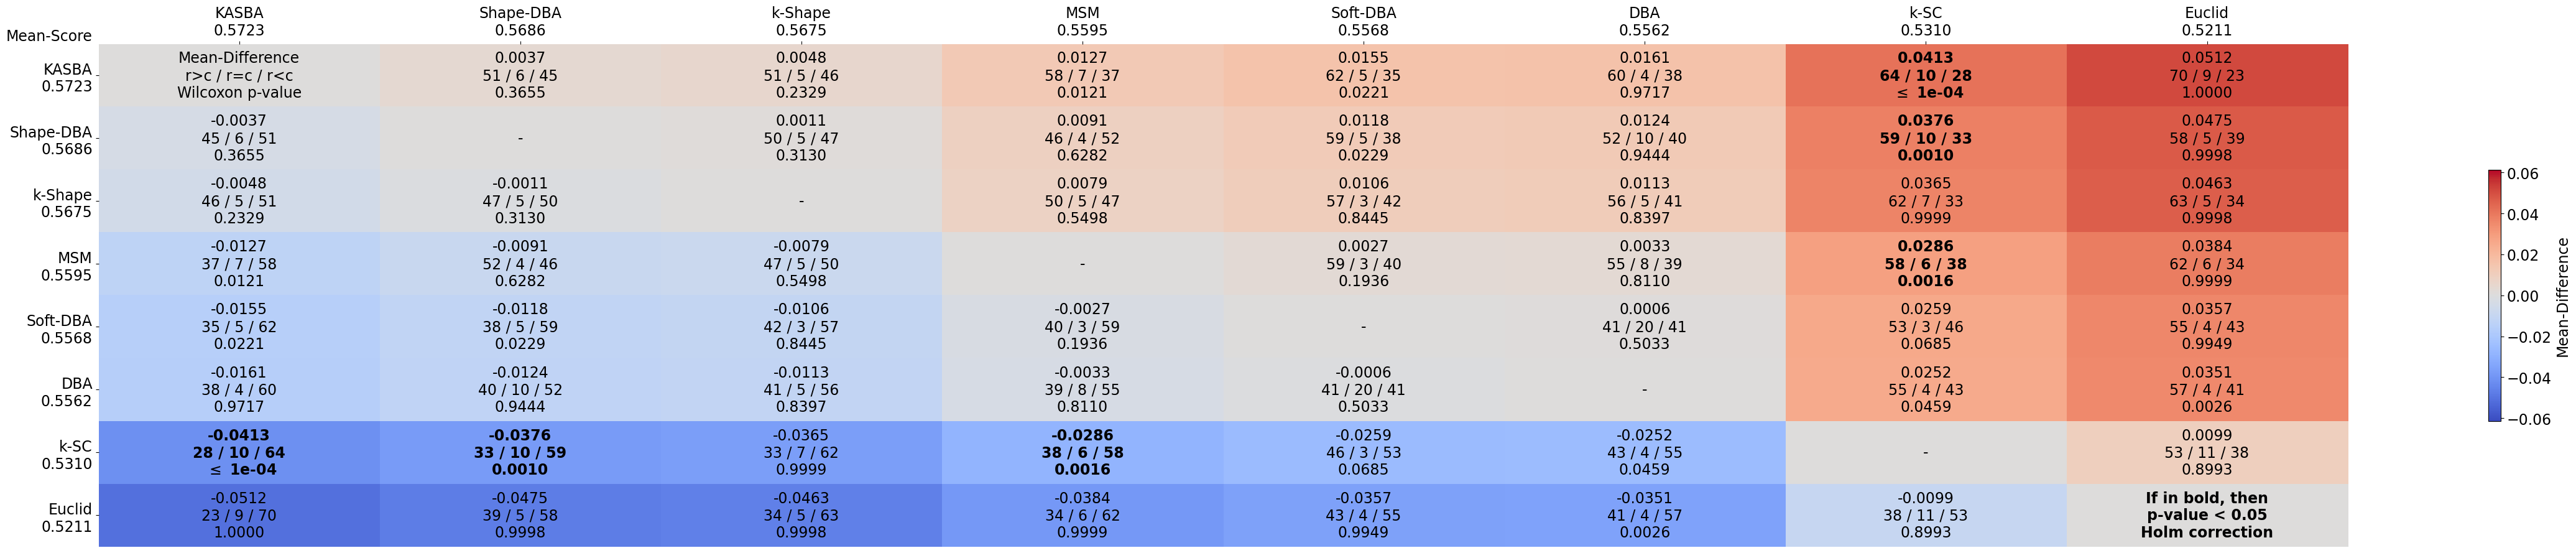

In [13]:
# MCM plot for test-train experiment
CLACC_PATH = f"{TRAIN_TEST_RESULT_PATH}/clacc_mean.csv"

df = pd.read_csv(CLACC_PATH)
df_no_first = df.iloc[:, 1:]

plot = create_multi_comparison_matrix(df_no_first, font_size=17)